In [20]:
## Importing required packages
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from dotenv import load_dotenv

In [ ]:
## Initiating the environment
load_dotenv()

## Defining and initiating llm
llm = HuggingFaceEndpoint(
    repo_id= 'meta-llama/Llama-3.3-70B-Instruct'
    )

model = ChatHuggingFace(llm = llm)

NameError: name 'load_dotenv' is not defined

In [22]:
## Defining the state class
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    score: int

In [23]:
## Defining functions that are used in nodes to run the workflow
def generate_outline(state: BlogState) -> BlogState:

    ## Extract title from the state
    title = state['title']

    ## Form a prompt
    prompt = f'Generate the outline from the given title: {title}'

    ## Generate the outline from the title
    outline = model.invoke(prompt).content

    ## Update the answer in the state
    state['outline'] = outline

    return state


def generate_topic(state: BlogState) -> BlogState:

    ## Extract title, outline from the state
    title = state['title']
    outline = state['outline']

    ## Form a prompt
    prompt = f'Generate the detailed report from the given outline : {outline}'

    ## Generate the report from the title
    content = model.invoke(prompt).content

    ## Update the answer in the state
    state['content'] = content

    return state


def evaluate_score(state: BlogState) -> BlogState:

    ## Extract title, outline, content, score from the state
    title = state['title']
    outline = state['outline']
    content = state['content']

    ## Form a prompt
    prompt = f'Based on the given outline - {outline} and the content - {content}, generate a integer relavancy score out of 10 where 0 is lowest similarity and 10 is the highest.'

    ## Generate the report from the title
    score = model.invoke(prompt).content

    ## Update the answer in the state
    state['score'] = score

    return state


In [24]:
## Defining graph
graph = StateGraph(BlogState)

## Add nodes
graph.add_node('generate_outline', generate_outline)
graph.add_node('generate_topic', generate_topic)
graph.add_node('evaluate_score', evaluate_score)


## Add edges
graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline', 'generate_topic')
graph.add_edge('generate_topic', 'evaluate_score')
graph.add_edge('generate_topic', END)


## Compile graph
workflow = graph.compile()

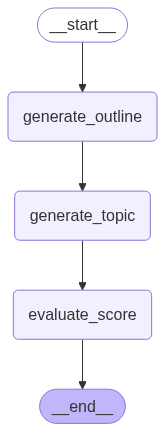

In [25]:
# Visualize the graph
workflow

In [26]:
## Invoke graph
initial_state = {'title' : 'SpaceX'} 
final_state = workflow.invoke(initial_state)
print(final_state)

Our latest automated health check on model 'meta-llama/Llama-3.2-1B-Instruct' for provider 'novita' did not complete successfully.  Inference call might fail.
Our latest automated health check on model 'meta-llama/Llama-3.2-1B-Instruct' for provider 'novita' did not complete successfully.  Inference call might fail.
Our latest automated health check on model 'meta-llama/Llama-3.2-1B-Instruct' for provider 'novita' did not complete successfully.  Inference call might fail.


{'title': 'SpaceX', 'outline': 'Here\'s a possible outline based on the title "SpaceX":\n\nI. Introduction\n- Overview of SpaceX\n- Mission and goals\n\nII. History\n- Founding and early years (1970s)\n- First rocket and satellite launches (1980s)\n- First private space station launch (1990s)\n- Key milestones and achievements (2000s-2010s)\n\nIII. Mission and Achievements\n- Reusability and Falcon 9 launch vehicle\n- Crewed missions and Dragon spacecraft\n- Starlink satellite constellation\n- Inspiration4 mission and commercial space tourism\n\nIV. Technological advancements\n- Advanced propulsion systems (e.g. Raptor engine)\n- In-orbit refueling and servicing\n- Satellite manufacturing and deployment\n- Commercial satellite manufacturing and services\n\nV. Controversies and challenges\n- Funding and financial struggles\n- Competition with Blue Origin and other space companies\n- Regulatory hurdles and oversight\n- Environmental concerns and sustainability\n\nVI. Future plans and pro

In [27]:
## Checking the generated outline
print(final_state['outline'])

Here's a possible outline based on the title "SpaceX":

I. Introduction
- Overview of SpaceX
- Mission and goals

II. History
- Founding and early years (1970s)
- First rocket and satellite launches (1980s)
- First private space station launch (1990s)
- Key milestones and achievements (2000s-2010s)

III. Mission and Achievements
- Reusability and Falcon 9 launch vehicle
- Crewed missions and Dragon spacecraft
- Starlink satellite constellation
- Inspiration4 mission and commercial space tourism

IV. Technological advancements
- Advanced propulsion systems (e.g. Raptor engine)
- In-orbit refueling and servicing
- Satellite manufacturing and deployment
- Commercial satellite manufacturing and services

V. Controversies and challenges
- Funding and financial struggles
- Competition with Blue Origin and other space companies
- Regulatory hurdles and oversight
- Environmental concerns and sustainability

VI. Future plans and prospects
- Starship and lunar missions
- Mars exploration and pot

In [28]:
## Checking the generated content
print(final_state['content'])

**SpaceX: A Comprehensive Report**

**I. Introduction**

SpaceX is a leading private space exploration company founded in 2002 by Elon Musk. With a mission to reduce space transportation costs and enable the colonization of Mars, SpaceX has made significant strides in the space industry. This report provides an overview of SpaceX's history, mission and achievements, technological advancements, controversies, and future plans.

**II. History**

### Founding and Early Years (1970s)

SpaceX was founded by Elon Musk in 2002, with the goal of reducing space transportation costs and enabling the colonization of Mars. Initially, the company focused on developing launch vehicles and spacecraft, but it quickly expanded its scope to include satellite launches and space tourism.

### First Rocket and Satellite Launches (1980s)

SpaceX's first successful launch was in 2008, when it launched a Falcon 1 rocket into orbit. This achievement marked the beginning of SpaceX's growth and expansion into th

In [29]:
## Checking the generated outline
print(final_state['score'])

I'll assign a reliability score of 7 out of 10 to the report "SpaceX: A Comprehensive Report." Here's a breakdown of the reasons:

**Strengths:**

1. The report provides a thorough overview of SpaceX's history, mission, and achievements, including its reusability, Starlink satellite constellation, and Inspiration4 mission.
2. The report covers various aspects of SpaceX's technology, such as advanced propulsion systems, in-orbit refueling and servicing, satellite manufacturing and deployment, and commercial satellite manufacturing and services.
3. The report highlights SpaceX's challenges, including funding and financial struggles, competition with Blue Origin and other space companies, regulatory hurdles and oversight, and environmental concerns and sustainability.

**Weaknesses:**

1. The report lacks context and provides a somewhat disjointed structure. The topics are introduced without a clear chronological order, making it difficult to follow the narrative.
2. The report relies hea